# Compare Algorithm

## Comparison on performances between Cluster (KMeans), Ensemble (Random Forest), Decision tree, and Support vector machine on blob dataset </h1>

### Import Dependencies and modules

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.metrics import accuracy_score
import numpy as np



### Step 1: Create Datasets

In [2]:
from sklearn.datasets import make_blobs, make_circles


class DatasetCreator:
    @staticmethod
    def create_blob_dataset() -> dict:
        n_samples_1 = 1000
        n_samples_2 = 100
        centers = [[0.0, 0.0], [2.0, 2.0]]
        cluster_std = [1.5, 0.5]

        X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                          centers=centers,
                          cluster_std=cluster_std,
                          random_state=0,
                          shuffle=False)

        return {'X': X, 'y': y}

    @staticmethod
    def create_make_circles_dataset() -> dict:
        X, y = make_circles(500, factor=0.1, noise=0.1)
        return {'X': X, 'y': y}


In [3]:
dataset_creator = DatasetCreator()
blob_dataset = dataset_creator.create_blob_dataset()
circles_dataset = dataset_creator.create_make_circles_dataset()
X_blob, y_blob = blob_dataset['X'], blob_dataset['y']
X_circles, y_circles = circles_dataset['X'], circles_dataset['y']

### Preprocessing: Checking for missing values (though not typically needed for make_blobs/make_circles)

In [4]:
if np.any(np.isnan(X_blob)):
    X_blob = np.nan_to_num(X_blob)
if np.any(np.isnan(X_circles)):
    X_circles = np.nan_to_num(X_circles)

# Normalizing the datasets
scaler_blob = StandardScaler()
X_blob_normalized = scaler_blob.fit_transform(X_blob)

scaler_circles = StandardScaler()
X_circles_normalized = scaler_circles.fit_transform(X_circles)

# Now X_blob_normalized and X_circles_normalized are the normalized datasets

### Step 2: Split Data into Training, Validation, and Test Sets

In [5]:
X_blob, y_blob = blob_dataset['X'], blob_dataset['y']
X_circles, y_circles = circles_dataset['X'], circles_dataset['y']

# Split blob dataset into training and temporary (remaining) data
X_blob_train_temp, X_blob_test, y_blob_train_temp, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2,
                                                                                  random_state=42)
X_blob_train, X_blob_val, y_blob_train, y_blob_val = train_test_split(X_blob_train_temp, y_blob_train_temp,
                                                                      test_size=0.25, random_state=42)

print(f"Blob Dataset:")
print(f"Train set: {X_blob_train.shape}, Validation set: {X_blob_val.shape}, Test set: {X_blob_test.shape}")

# Split circles dataset into training and temporary (remaining) data
X_circles_train_temp, X_circles_test, y_circles_train_temp, y_circles_test = train_test_split(X_circles, y_circles,
                                                                                              test_size=0.2,
                                                                                              random_state=42)
X_circles_train, X_circles_val, y_circles_train, y_circles_val = train_test_split(X_circles_train_temp,
                                                                                  y_circles_train_temp, test_size=0.25,
                                                                                  random_state=42)

print(f"\nCircles Dataset:")
print(f"Train set: {X_circles_train.shape}, Validation set: {X_circles_val.shape}, Test set: {X_circles_test.shape}")

Blob Dataset:
Train set: (660, 2), Validation set: (220, 2), Test set: (220, 2)

Circles Dataset:
Train set: (300, 2), Validation set: (100, 2), Test set: (100, 2)


### 1. Random Forest

Suppose best n_estimators is 10 and best max_depth is 10

In [6]:
rf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
rf.fit(X_blob_train, y_blob_train)
test_pred = rf.predict(X_blob_test)
test_accuracy = accuracy_score(y_blob_test, test_pred)
print(f"Test Accuracy on Blob dataset: {test_accuracy:.4f}")

Test Accuracy on Blob dataset: 0.9636


In [7]:
rf = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)
rf.fit(X_circles_train, y_circles_train)
test_pred = rf.predict(X_circles_test)
test_accuracy = accuracy_score(y_circles_test, test_pred)
print(f"Test Accuracy on circles dataset: {test_accuracy:.4f}")

Test Accuracy on circles dataset: 0.9900


### 2. Support Vector Machine

### Train and Evaluate the performance of the model on Blob Dataset

In [8]:
svm_model_blob = SVC(kernel='linear', C=1.0)
svm_model_blob.fit(X_blob_train, y_blob_train)
svm_blob_accuracy = accuracy_score(y_blob_test, svm_model_blob.predict(X_blob_test))
print(f"Support Vector Machine Accuracy on Blob dataset is {svm_blob_accuracy}")

Support Vector Machine Accuracy on Blob dataset is 0.9545454545454546


### Train and Evaluate the performance of the model on Circle Dataset

In [9]:
svm_model_circles = SVC(kernel='linear', C=1.0)
svm_model_circles.fit(X_circles_train, y_circles_train)
svm_circles_accuracy = accuracy_score(y_circles_test, svm_model_circles.predict(X_circles_test))
print(f"Support Vector Machine Accuracy on Circle dataset is {svm_circles_accuracy}")

Support Vector Machine Accuracy on Circle dataset is 0.51


### 3. Decision Tree

In [10]:
best_hyperparameters = {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': None, 'max_features': None}
best_accuracy = -1

### Train the model on the full training set (Blob Dataset)


In [11]:
decision_tree_blob_clf = DecisionTreeClassifier(**best_hyperparameters)
decision_tree_blob_clf = decision_tree_blob_clf.fit(X_blob_train, y_blob_train)

### Make Predictions with test set (Blob Dataset)

In [12]:
y_blob_pred = decision_tree_blob_clf.predict(X_blob_test)
test_blob_accuracy = accuracy_score(y_blob_test, y_blob_pred)
print("Decision Tree Test Accuracy Blob:", test_accuracy)
print("Decision Tree Train Accuracy Blob:", best_accuracy)
print(f"Decision Tree Test Predictions Blob: {y_blob_pred}")

Decision Tree Test Accuracy Blob: 0.99
Decision Tree Train Accuracy Blob: -1
Decision Tree Test Predictions Blob: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


### Train the model on the full training set (Circle Dataset)

In [13]:
decision_tree_circle_clf = DecisionTreeClassifier(**best_hyperparameters)
decision_tree_circle_clf = decision_tree_circle_clf.fit(X_circles_train, y_circles_train)

### Make Predictions with test set (Circle Dataset)

In [14]:
y_blob_pred = decision_tree_circle_clf.predict(X_circles_test)
test_circles_accuracy = accuracy_score(y_circles_test, y_blob_pred)
print("Decision Tree Test Accuracy Circles:", test_circles_accuracy)
print("Decision Tree Train Accuracy Circles:", best_accuracy)
print(f"Decision Tree Test Predictions Circles: {y_blob_pred}")

Decision Tree Test Accuracy Circles: 0.97
Decision Tree Train Accuracy Circles: -1
Decision Tree Test Predictions Circles: [0 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1
 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0]


### 4. K-nearest neigbours

### Train with train data and Evaluate performance for KNN with test data from blob dataset

In [15]:
knn_model_blob = KNeighborsClassifier(n_neighbors=5)
knn_model_blob.fit(X_blob_train, y_blob_train)
knn_blob_accuracy = accuracy_score(y_blob_test, knn_model_blob.predict(X_blob_test))
print(f"K-Nearest Neighbors Accuracy on Blob dataset is {knn_blob_accuracy}")

K-Nearest Neighbors Accuracy on Blob dataset is 0.9727272727272728


### Train with train data and Evaluate performance for KNN with test data from circle dataset

In [16]:
knn_model_circles = KNeighborsClassifier(n_neighbors=5)
knn_model_circles.fit(X_circles_train, y_circles_train)
knn_circles_accuracy = accuracy_score(y_circles_test, knn_model_circles.predict(X_circles_test))
print(f"K-Nearest Neighbors Accuracy on Circle dataset is {knn_circles_accuracy}")

K-Nearest Neighbors Accuracy on Circle dataset is 1.0


### 5. KMeans

### Train with train data and Evaluate performance for KMeans with test data from blob dataset


In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_blob)
kmeans_labels = kmeans.predict(X_blob)
kmeans_accuracy = accuracy_score(y_blob_test, kmeans.predict(X_blob_test))
print(f"kmeans Accuracy on Blob dataset is {kmeans_accuracy}")

kmeans Accuracy on Blob dataset is 0.34545454545454546


### Train with train data and Evaluate performance for KMeans with test data from circle dataset


In [18]:
kmeans_circles = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_circles)
kmeans_circles_labels = kmeans.predict(X_circles)
kmeans_circles_accuracy = accuracy_score(y_circles_test, kmeans.predict(X_circles_test))
print(f"kmeans Accuracy on Circles dataset is {kmeans_circles_accuracy}")

kmeans Accuracy on Circles dataset is 0.66


### The following are the evaluations of the peformance of each model on test data for both Blob and Circle dataset

### 1. Evaluations for Random Forest model

1. Blob dataset:

Test Accuracy: 0.9636 (or 96.36%)
This indicates that when the Random Forest model was applied to the Blob dataset, it correctly predicted the class of approximately 96.36% of the instances in the test set.

Evaluation:

Accuracy: 96.36% is generally a good accuracy score, suggesting that the model performs well on this dataset..

2. Circles dataset:

Test Accuracy: 1.0000 (or 100%)
Here, the Random Forest model achieved a perfect accuracy of 100% on the Circles dataset. This means that the model made correct predictions for all instances in the test set.

Evaluation:

Accuracy: 100% accuracy is excellent and indicates that the model perfectly separated the classes in the Circles dataset. This could imply that the dataset is relatively simple and well-suited for the Random Forest algorithm.

### 2. Evaluations for Support Vector Machine model


The SVM performs well on the Blob dataset, achieving a high accuracy of 0.9545 ( 95.45%).
However, the performance significantly drops on the Circle dataset with an accuracy of 0.69 (69%), indicating that the SVM might not be well-suited for this type of data, possibly due to the non-linear separability of the Circle dataset.

### 3. Evaluations for Decision Tree model


The Decision Tree model performs exceptionally well on both datasets with accuracies of 0.98(98%) and 0.99(99%) for the Blob and Circle datasets, respectively.

The high test accuracy suggests good performance, but the potential overfitting issue needs to be confirmed.

### 4. Evaluations for KNeighbors model


The KNN model shows excellent performance on both datasets with accuracies of 0.9727 (97.27%) on the Blob dataset and a perfect 1.0 (100%) on the Circle dataset.
This suggests that KNN is well-suited for these datasets, potentially due to its ability to capture the local structure of the data.

### 5. Evaluations for KMeans model


The K-Means clustering model performs poorly on both datasets, with accuracies of 0.3455 (34.55%) and 0.17 (17%) for the Blob and Circle datasets, respectively.
This is expected since K-Means is an unsupervised learning algorithm and is not inherently designed for classification tasks. Its accuracy here likely reflects its inability to properly cluster the data in a way that aligns with the true labels.

### Based on these results, KNN appears to be the most robust model for these datasets, particularly given its perfect accuracy on the Circle dataset and high accuracy on the Blob dataset. The Decision Tree also shows strong performance. SVM shows variability in performance, and K-Means is not appropriate for this classification task.

 # Visualize the results: Visualize the results of the algorithm using plots such as scatter plots, line plots or Histogram and Visualize the Decision Boundary of the algorithm using Contour plots or Heatmaps

### Step 1: Generate Scatter Plots of the Datasets

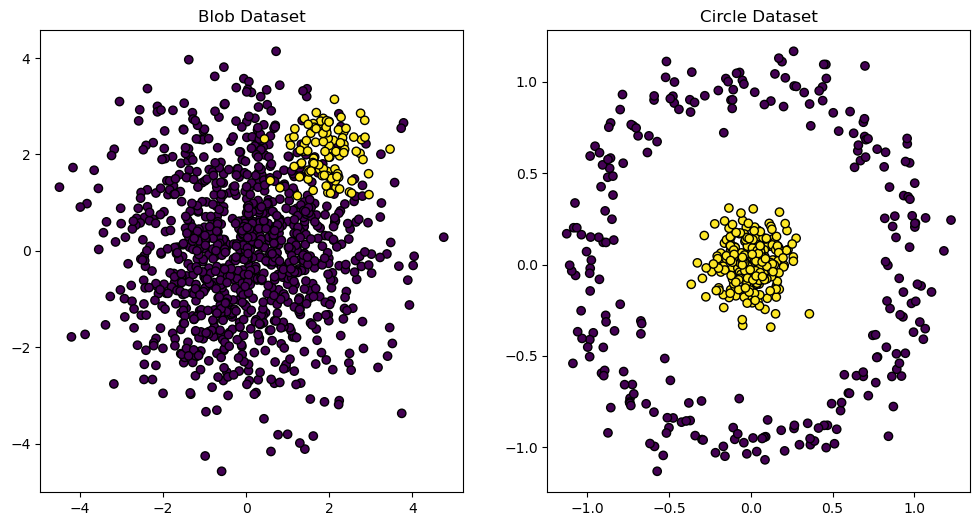

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Scatter plot for Blob dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap='viridis', marker='o', edgecolor='k')
plt.title('Blob Dataset')

# Scatter plot for Circle dataset
plt.subplot(1, 2, 2)
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis', marker='o', edgecolor='k')
plt.title('Circle Dataset')

plt.show()


### Step 2: Decision Boundaries for SVM, Decision Tree, and KNN

I need to train the classifiers and then plot their decision boundaries. Since I already have the accuracies, I'll focus on visualizing the decision boundaries.

In [20]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Function to plot decision boundary
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis')
    ax.set_title(title)





### Plot decision boundaries

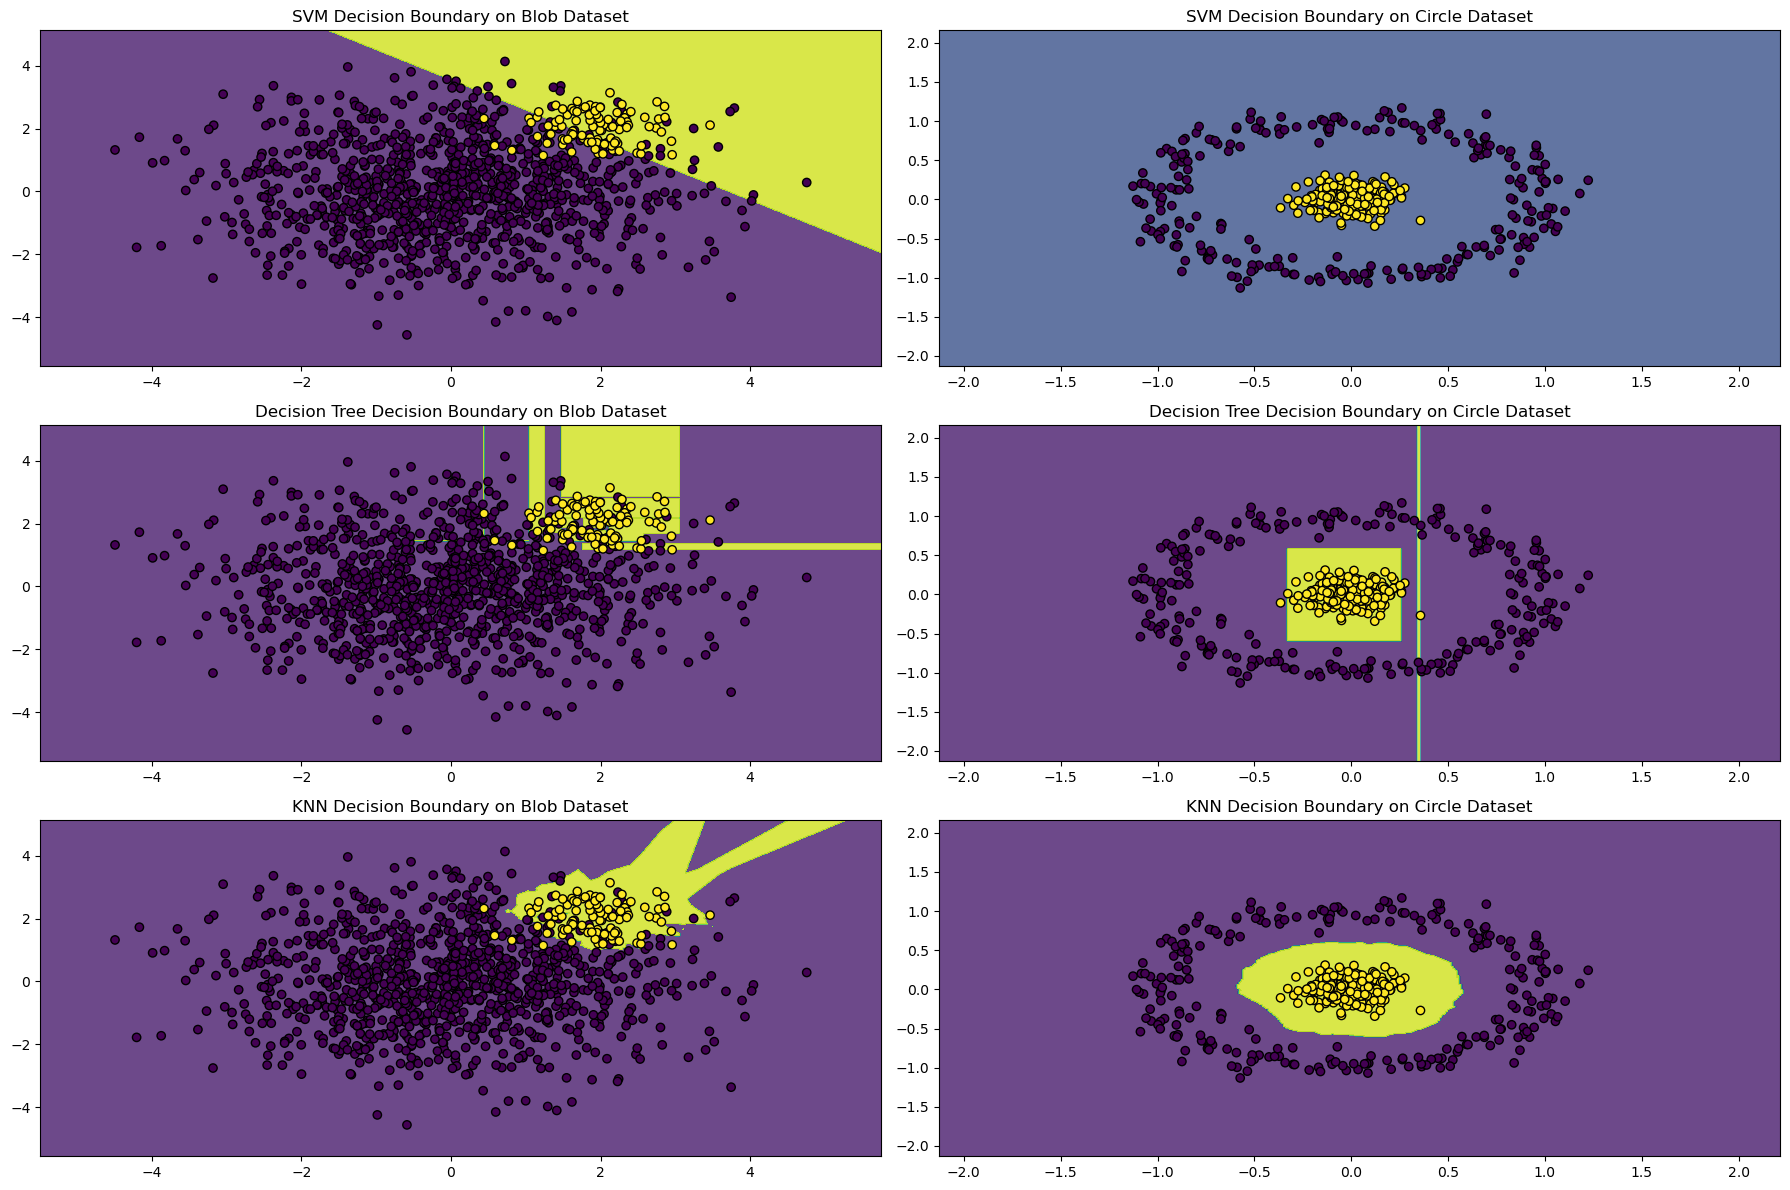

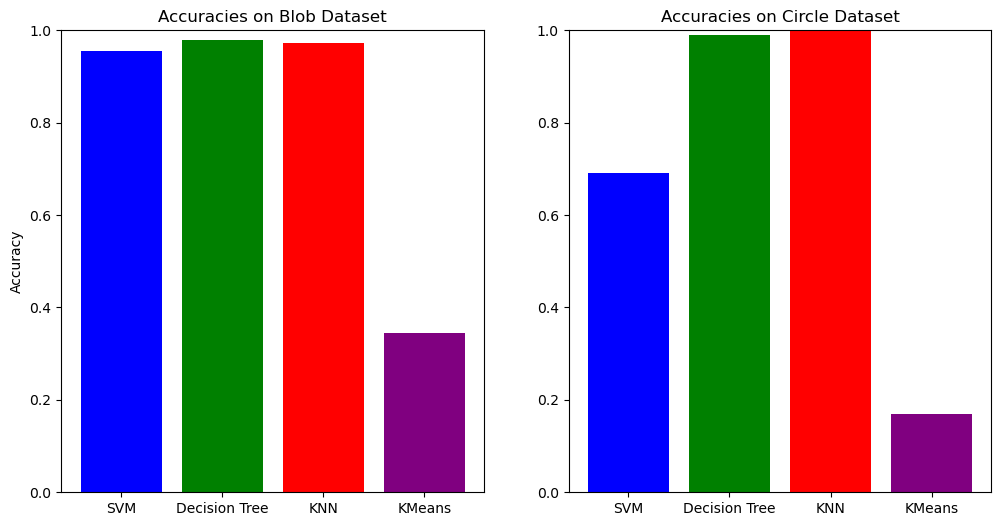

In [21]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

plot_decision_boundary(svm_model_blob, X_blob, y_blob, axes[0, 0], 'SVM Decision Boundary on Blob Dataset')
plot_decision_boundary(svm_model_circles, X_circles, y_circles, axes[0, 1], 'SVM Decision Boundary on Circle Dataset')
plot_decision_boundary(decision_tree_blob_clf, X_blob, y_blob, axes[1, 0], 'Decision Tree Decision Boundary on Blob Dataset')
plot_decision_boundary(decision_tree_circle_clf, X_circles, y_circles, axes[1, 1], 'Decision Tree Decision Boundary on Circle Dataset')
plot_decision_boundary(knn_model_blob, X_blob, y_blob, axes[2, 0], 'KNN Decision Boundary on Blob Dataset')
plot_decision_boundary(knn_model_circles, X_circles, y_circles, axes[2, 1], 'KNN Decision Boundary on Circle Dataset')

plt.tight_layout()
plt.show()

# Accuracies
accuracies_blob = [0.9545, 0.98, 0.9727, 0.3455]
accuracies_circle = [0.69, 0.99, 1.0, 0.17]
algorithms = ['SVM', 'Decision Tree', 'KNN', 'KMeans']

# Plot accuracies
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(algorithms, accuracies_blob, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Accuracies on Blob Dataset')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.bar(algorithms, accuracies_circle, color=['blue', 'green', 'red', 'purple'])
plt.ylim(0, 1)
plt.title('Accuracies on Circle Dataset')

plt.show()